In [1]:
## A cheeky notebook to check the outputs of the gp_LSD code
# Import the packages and make sure they are actually loaded new
%reload_ext autoreload
%autoreload 2
from gp_LSD import prepare_gunpowder_pipeline
import matplotlib.pyplot as plt
import numpy as np
import gunpowder as gp

In [2]:
load_path = '/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr'
output_shape = (20, 200, 200)
stack_size = 6
device = 'cpu'

pipeline, request = prepare_gunpowder_pipeline(load_path, output_shape, device) #stack_size 


# Build the pipeline and request the batch
with gp.build(pipeline):
    batch = pipeline.request_batch(request)

# Move the batch data to the specified device
if device == 'cuda':
    batch[raw].data = torch.from_numpy(batch[raw].data).cuda()
    batch[gt].data = torch.from_numpy(batch[gt].data).cuda()
    batch[gt_lsds].data = torch.from_numpy(batch[gt_lsds].data).cuda()
    batch[lsds_weights].data = torch.from_numpy(batch[lsds_weights].data).cuda()
    batch[gt_affs].data = torch.from_numpy(batch[gt_affs].data).cuda()
    

print("Raw shape: " + str(batch[gp.ArrayKey('RAW')].data.shape))
print("Ground truth shape: " + str(batch[gp.ArrayKey('GROUND_TRUTH')].data.shape))
print("GT LSDS shape: " + str(batch[gp.ArrayKey('GT_LSDS')].data.shape))
print("LSDS weights shape: " + str(batch[gp.ArrayKey('LSDS_WEIGHTS')].data.shape))
print("GT affs shape: " + str(batch[gp.ArrayKey('GT_AFFS')].data.shape))



    # raw = gp.ArrayKey('RAW')
    # gt = gp.ArrayKey('GROUND_TRUTH')
    # gt_lsds = gp.ArrayKey('GT_LSDS')
    # lsds_weights = gp.ArrayKey('LSDS_WEIGHTS')
    # gt_affs = gp.ArrayKey('GT_AFFS')



    # gt_lsds = gp.ArrayKey('GT_LSDS')
    # lsds_weights = gp.ArrayKey('LSDS_WEIGHTS')
    # gt_affs = gp.ArrayKey('GT_AFFS')

DEBUG:gunpowder.array:Registering array key RAW
DEBUG:gunpowder.array:Registering array key GROUND_TRUTH
DEBUG:gunpowder.array:Registering array key GT_LSDS
DEBUG:gunpowder.array:Registering array key LSDS_WEIGHTS
DEBUG:gunpowder.array:Registering array key GT_AFFS
DEBUG:gunpowder.nodes.batch_provider:Current spec of ZarrSource[/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr]:
None
DEBUG:gunpowder.nodes.batch_provider:ZarrSource[/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr] provides RAW with spec ROI: [0:16000, 0:48000, 0:48000] (16000, 48000, 48000), voxel size: (250, 75, 75), interpolatable: True, non-spatial: False, dtype: uint16, placeholder: False
DEBUG:gunpowder.nodes.batch_provider:Current spec of ZarrSource[/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr]:

	RAW: ROI: [0:16000, 0:48000, 0:48000] (16000, 48000, 48000), voxel size: (250, 75, 75), interpolatable: True, non-spatial: False, dtype: uint16, placeholder: False

DEBUG:gunpowder.nodes.bat

DEBUG:gunpowder.nodes.batch_provider:AddAffinities got request 
	RAW: ROI: [0:5000, 0:15000, 0:15000] (5000, 15000, 15000), voxel size: None, interpolatable: None, non-spatial: False, dtype: None, placeholder: False
	GROUND_TRUTH: ROI: [0:5000, 0:15000, 0:15000] (5000, 15000, 15000), voxel size: None, interpolatable: None, non-spatial: False, dtype: None, placeholder: False
	GT_LSDS: ROI: [0:5000, 0:15000, 0:15000] (5000, 15000, 15000), voxel size: None, interpolatable: None, non-spatial: False, dtype: None, placeholder: False
	LSDS_WEIGHTS: ROI: [0:5000, 0:15000, 0:15000] (5000, 15000, 15000), voxel size: None, interpolatable: None, non-spatial: False, dtype: None, placeholder: False
	GT_AFFS: ROI: [0:5000, 0:15000, 0:15000] (5000, 15000, 15000), voxel size: None, interpolatable: None, non-spatial: False, dtype: None, placeholder: False

DEBUG:gunpowder.nodes.batch_provider:AddLocalShapeDescriptor got request 
	RAW: ROI: [0:5000, 0:15000, 0:15000] (5000, 15000, 15000), voxel size: Non

Raw shape: (20, 200, 200)
Ground truth shape: (20, 200, 200)
GT LSDS shape: (10, 20, 200, 200)
LSDS weights shape: (10, 20, 200, 200)
GT affs shape: (3, 20, 200, 200)


In [ ]:
# Load the raw and gt data as arraykey
raw_data = batch[gp.ArrayKey('RAW')].data
gt_data = batch[gp.ArrayKey('GROUND_TRUTH')].data
lsd_data = batch[gp.ArrayKey('GT_LSDS')].data
lsd_weights = batch[gp.ArrayKey('LSDS_WEIGHTS')].data
aff_data = batch[gp.ArrayKey('GT_AFFS')].data

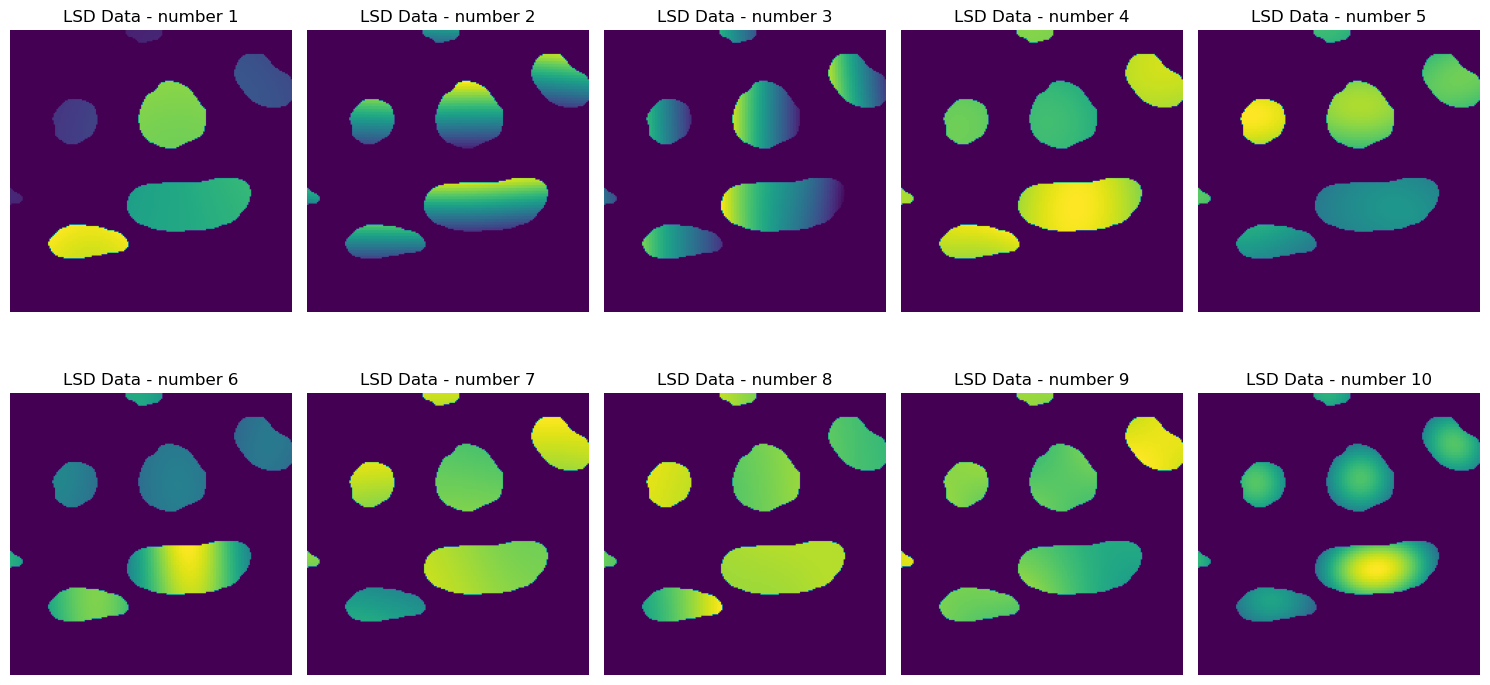

In [19]:
chosen_z_plane = 5  # Adjust this to the desired z-plane

# Create a figure with subplots for the 10 plots
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(lsd_data[i, chosen_z_plane, :, :], cmap='viridis')  # Adjust the colormap as needed
    plt.title(f'LSD Data - number {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

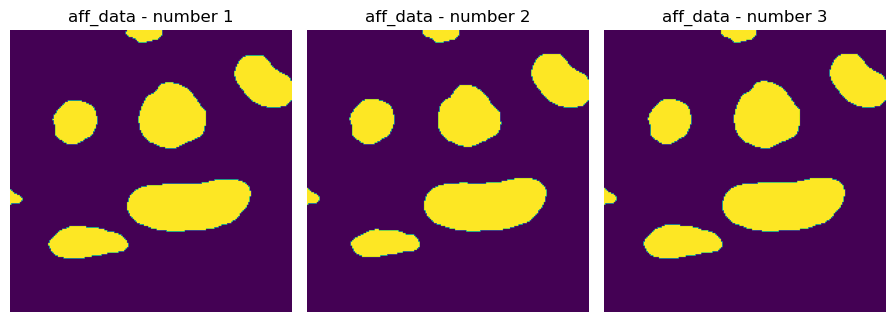

In [23]:
chosen_z_plane = 5  # Adjust this to the desired z-plane

# Create a figure with subplots for the 10 plots
plt.figure(figsize=(15, 8))
for i in range(3):
    plt.subplot(2, 5, i + 1)
    plt.imshow(aff_data[i, chosen_z_plane, :, :], cmap='viridis')  # Adjust the colormap as needed
    plt.title(f'aff_data - number {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

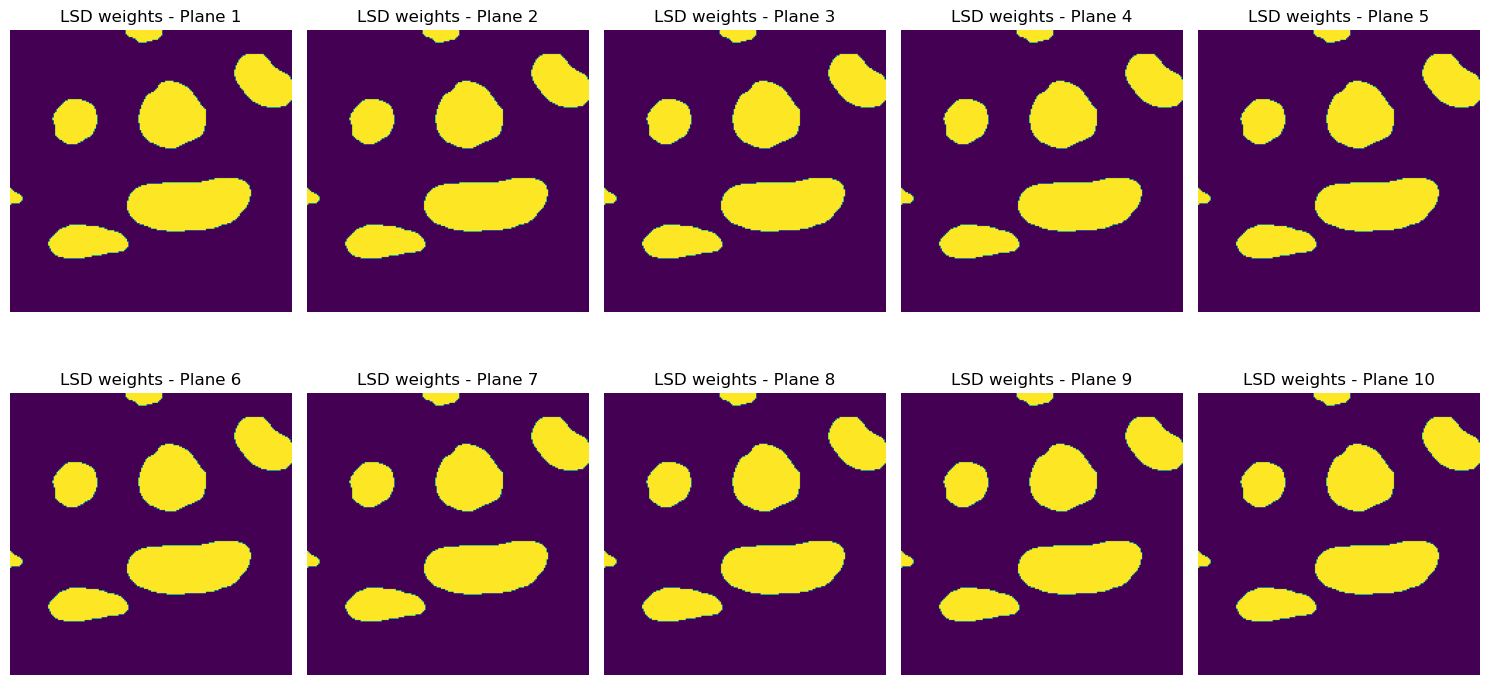

In [22]:
chosen_z_plane = 5  # Adjust this to the desired z-plane

# Create a figure with subplots for the 10 plots
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(lsd_weights[i, chosen_z_plane, :, :], cmap='viridis')  # Adjust the colormap as needed
    plt.title(f'LSD weights - Plane {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

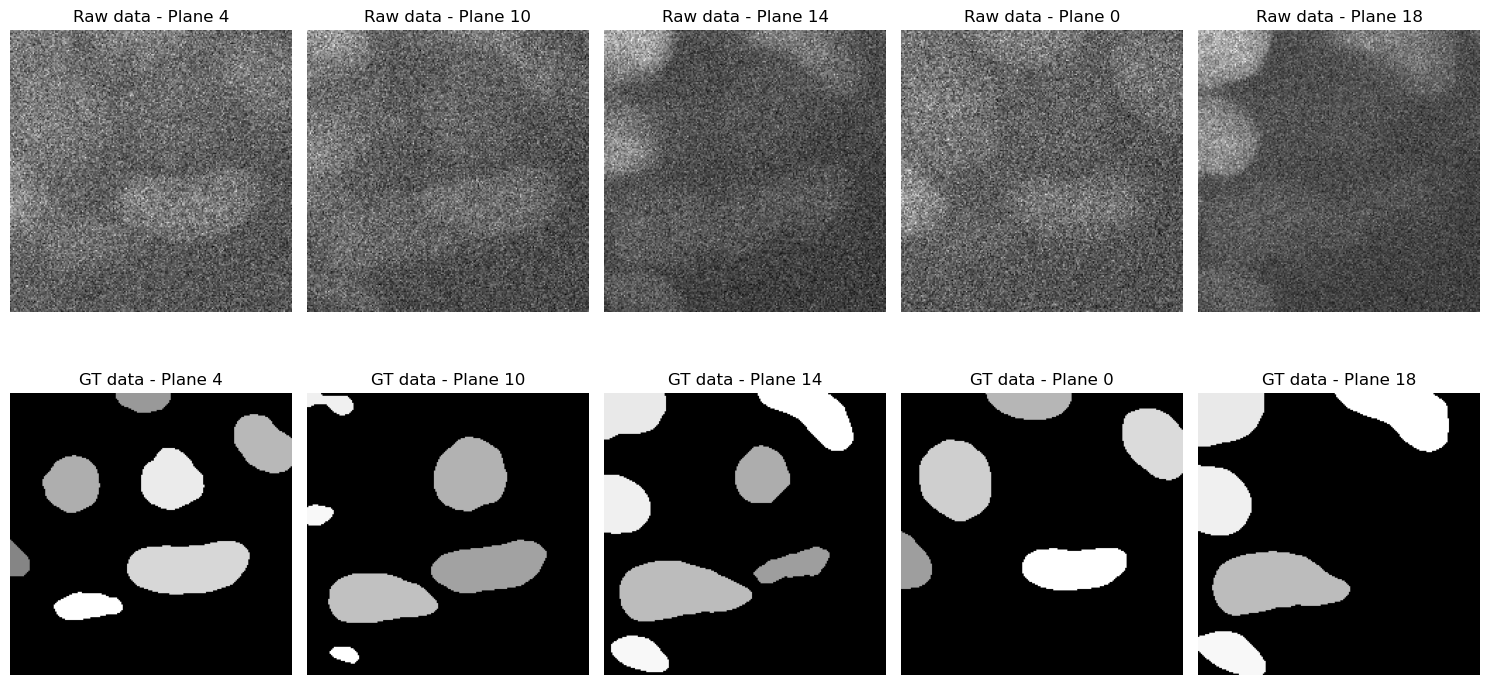

In [21]:
num_planes = raw_data.shape[0]

# Choose 5 random plane indices
random_plane_indices = np.random.choice(num_planes, 5, replace=False)

# Create a figure with subplots for the 5 planes
plt.figure(figsize=(15, 8))
for i, plane_index in enumerate(random_plane_indices):
    # Plot the raw_data plane
    plt.subplot(2, 5, i + 1)
    plt.imshow(raw_data[plane_index, :, :], cmap='gray')
    plt.title(f'Raw data - Plane {plane_index}')
    plt.axis('off')

    # Plot the gt_data plane underneath
    plt.subplot(2, 5, i + 6)
    plt.imshow(gt_data[plane_index, :, :], cmap='gray')
    plt.title(f'GT data - Plane {plane_index}')
    plt.axis('off')

plt.tight_layout()
plt.show()

DEBUG:gunpowder.array:Registering array key RAW
DEBUG:gunpowder.array:Registering array key GROUND_TRUTH
DEBUG:gunpowder.array:Registering array key GT_LSDS
DEBUG:gunpowder.array:Registering array key LSDS_WEIGHTS
DEBUG:gunpowder.array:Registering array key GT_AFFS


TypeError: Invalid shape (200,) for image data

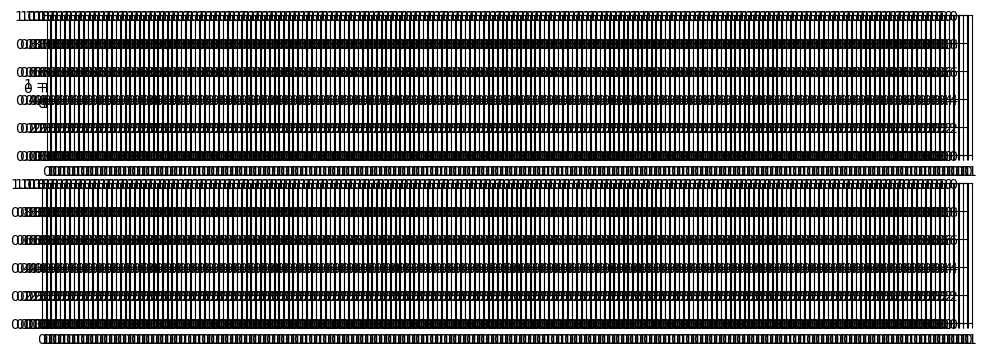

In [6]:




##### Make a plot function ####



# Select the z-slice (e.g., the middle one), for 3D data
# z_slice = raw_data.shape[0] // 2  # Assuming the z-dimension is the second dimension

# Select all stack images for both raw and GT
raw_images = raw_data[ 0, :, :]
gt_images = gt_data[0, :, :]

# Create a figure with subplots
fig, axes = plt.subplots(2, len(raw_images), figsize=(stack_size*2, 4))

# Iterate through the images and plot each one
for i in range(len(raw_images)):
    raw_min, raw_max = np.min(raw_images[i]), np.max(raw_images[i])
    gt_min, gt_max = np.min(gt_images[i]), np.max(gt_images[i])

    axes[0][i].imshow(raw_images[i], cmap='viridis', vmin=raw_min, vmax=raw_max)
    axes[0][i].set_title(f'Raw Image {i+1}')
    axes[0][i].axis('off')

    axes[1][i].imshow(gt_images[i], cmap='viridis', vmin=0, vmax=0.1)
    axes[1][i].set_title(f'GT Image {i+1}')
    axes[1][i].axis('off')

# Show the plot
plt.show()